## ノック71: ネットワークの可視化

In [1]:
import pandas as pd
df_links = pd.read_csv("links.csv")
print(len(df_links))
df_links.head()

20


,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


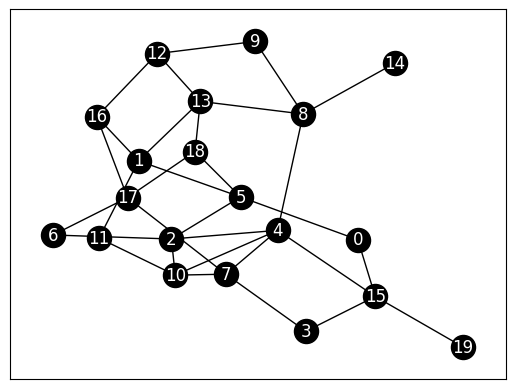

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
NUM = len(df_links.index)
for i in range(1, NUM+1):
  node_no = df_links.columns[i].strip("Node")
  # print(node_no)
  G.add_node(str(node_no))

# 辺の設定
for i in range(NUM):
  for j in range(NUM):
    # print(i,j)
    node_name = "Node" + str(j)
    if df_links[node_name].iloc[i]==1:
      G.add_edge(str(i),str(j))

# 描画
nx.draw_networkx(G, node_color="k",edge_color="k", font_color="w")
plt.show()

## ノック72: 情報伝播の様子を可視化

In [3]:
# 1割の確立で口コミが伝播と仮定してシミュレーションする
import numpy as np

In [4]:
## 確率的に口コミを伝播させるか決定する関数
def determine_link(percent):
  rand_val=np.random.rand()
  if rand_val<=percent:
    return 1
  else:
    return 0

In [5]:
## 口コミをシミュレートする関数
# num:人数、list_active:それぞれのノード(人)に口コミが伝わったかどうかを0,1で表現する
# percent_percolation:口コミの起こる確率
def simulate_percolation(num, list_active, percent_percolation):
  for i in range(num):
    if list_active[i]==1:
      for j in range(num):
        node_name = "Node" + str(j)
        if df_links[node_name].iloc[i]==1:
          if determine_link(percent_percolation)==1:
            list_active[j] = 1
  return list_active

In [6]:
## 条件を与えて計算
percent_percolation = 0.1  #口コミが起こる確率0.1(10%)
T_NUM = 36  #繰り返すステップ数。今回は36ヶ月分
NUM = len(df_links.index)
# print(NUM)

list_active = np.zeros(NUM)
# print(list_active)

list_active[0] = 1
# print(list_active)

list_timeSeries = []
for t in range(T_NUM):
  list_active = simulate_percolation(NUM, list_active, percent_percolation)
  list_timeSeries.append(list_active.copy())

In [7]:
# print(len(list_active))
# list_active

In [8]:
# print(len(list_timeSeries))
# list_timeSeries

In [9]:
## 口コミ伝播の様子を色付けして可視化する
def active_node_coloring(list_active):
  print(list_timeSeries[t])
  list_color = []
  for i in range(len(list_timeSeries[t])):
    if list_timeSeries[t][i]==1:
      list_color.append("r")
    else:
      list_color.append("k")
  # print(list_color)
  # print(len(list_color))
  return list_color

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


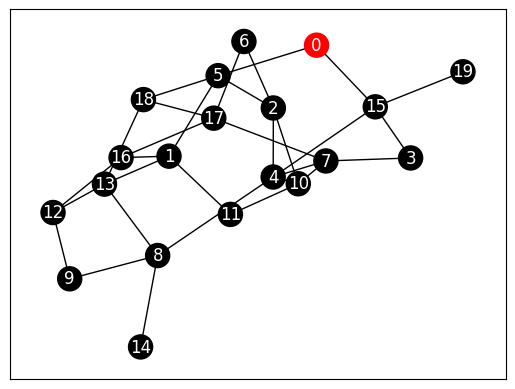

In [10]:
# 実行
t = 0
nx.draw_networkx(G, font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.]


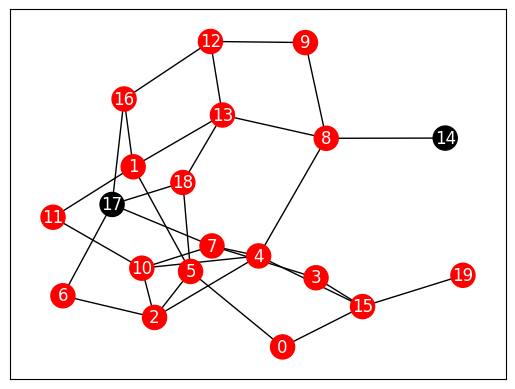

In [11]:
# 実行
t = 11
nx.draw_networkx(G, font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


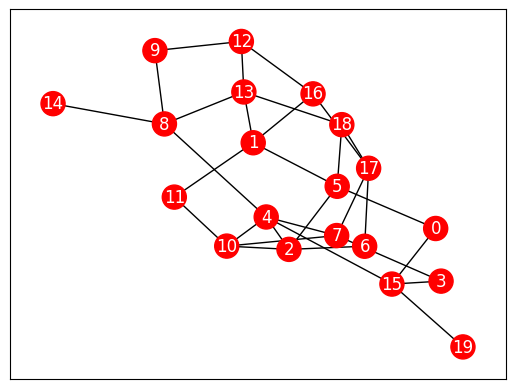

In [12]:
# 実行
t = 35
nx.draw_networkx(G, font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

## ノック73: 口コミ数の時系列変化をグラフ化

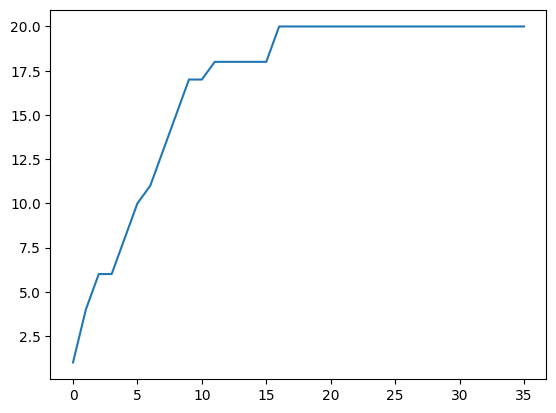

In [13]:
# 簡単なグラフ化
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

## ノック74: 会員数の時系列変化のシミュレーション

In [14]:
# 口コミによりジムの利用状況の変化をシミュレート

def simulate_population(num, list_active, percent_percolation, percent_disapparence, df_links):
  # 拡散 #
  for i in range(num):
    if list_active[i]==1:
      for j in range(num):
        if df_links.iloc[i][j]==1:
          if determine_link(percent_percolation)==1:
            list_active[j]==1

  # 消滅 #
  for i in range(num):
    if determine_link(percent_disapparence)==1:
      list_active[i] = 0
  
  return list_active

In [15]:
# 条件入力
percent_percolation = 0.1  #10%の確率で伝播
percent_disapparence = 0.05  #5%の確率で会員を脱退
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []

for t in range(T_NUM):
  list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
  list_timeSeries.append(list_active.copy())

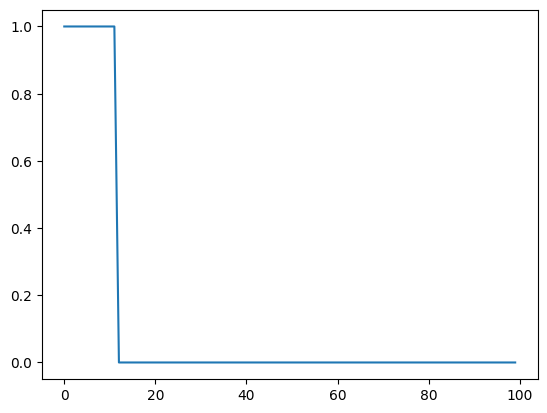

In [16]:
# 時系列グラフを描く
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

In [17]:
# 条件入力(消滅する条件を厳しくしてみる)
percent_percolation = 0.1  #10%の確率で伝播
percent_disapparence = 0.2  #20%の確率で会員を脱退
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []

for t in range(T_NUM):
  list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
  list_timeSeries.append(list_active.copy())

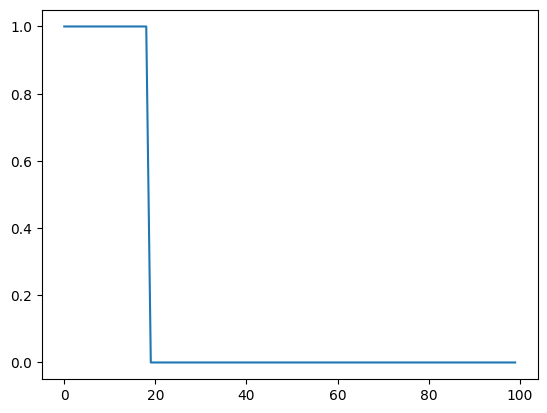

In [18]:
# 時系列グラフを描く
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

## ノック75: パラメータの全体像を把握

In [19]:
# 各要素の確率が、商品の普及にどう影響するかの相図を描く
T_NUM = 0
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram, NUM_PhaseDiagram))
for i_p in range(NUM_PhaseDiagram):
  for i_d in range(NUM_PhaseDiagram):
    percent_percolation = 0.05*i_p
    percent_disapparence = 0.05*i_d
    list_active = np.zeros(NUM)
    list_active[0] = 1
    for t in range(T_NUM):
      list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
      phaseDiagram[i_p][i_d] = sum(list_active)

In [20]:
phaseDiagram

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [21]:
sum(list_active)

1.0

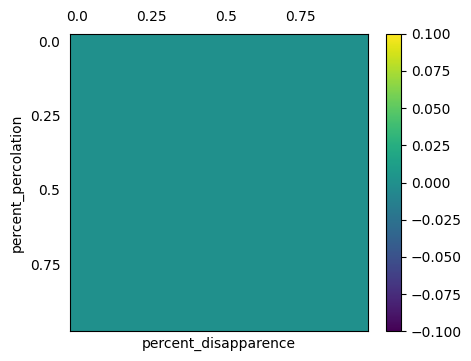

In [22]:
# 相図の表示
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel("percent_disapparence")
plt.ylabel("percent_percolation")
plt.xticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
plt.show()

## ノック76: 実データの読み込み

In [23]:
df_mem_links = pd.read_csv("links_members.csv")
df_mem_info = pd.read_csv("info_members.csv")

In [24]:
df_mem_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [25]:
df_mem_info.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## ノック77: リンク数の可視化

In [26]:
# リンク数を可視化して、ネットワークの構造を掴む
NUM = len(df_mem_links.index)
print(NUM)
array_linkNum = np.zeros(NUM)
# print(array_linkNum)

for i in range(NUM):
  array_linkNum[i] = sum(df_mem_links["Node"+str(i)])
print(array_linkNum)

540
[ 32. 128. 155.  44. 108.  32. 152. 135. 143.  75. 125.  96. 107. 141.
 165.  71.  92. 180.  67.  30.  79.  11. 195. 139. 175. 148. 127. 162.
  95. 125.  55. 120. 148. 114. 143.  22. 129.  56.  17.  79.  78.  78.
 159. 183.  79.  99.  36.  41. 136.  31. 119. 180. 169. 167. 124.  37.
 152.  21.  77.  55.  38.  67. 103. 103. 114. 109.  92. 122. 190.  33.
 196.  50. 165.  17. 123.  97.  19. 132.  54. 113. 106. 174. 111. 107.
 193. 117. 164.  53. 125.  67. 175.  82. 111.  94.  98. 106.  89.  28.
  98.  41.  59.  55. 146. 131.  91.  45. 136.  89. 122.  65. 110.  88.
 117.  71. 157. 112. 106. 148.  54. 127. 149. 174.  89.  65. 159.  56.
 109. 105. 133.  64. 126.  98. 118.  87.  98.  99.  45. 123.  90. 100.
  85. 133. 129.  53.  80.  35.  61. 124. 109. 101. 166.  49.  57. 128.
  65. 134.  72.  51.  91.  35.  87.  69. 109.  84.  99.  99. 115.  93.
 123.  58. 183. 117. 123.  53. 176. 121.  61.  88. 140.  99.  99. 101.
 127. 162.  92. 141.  46. 122.  73.  91.  78.  71. 171.  69. 116. 198.
 1

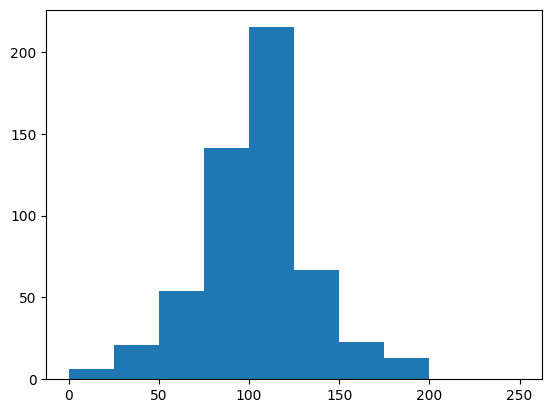

In [27]:
plt.hist(array_linkNum, bins=10, range=(0,250))
plt.show()

## ノック78: 実データからパラメータ推定

In [28]:
NUM = len(df_mem_info.index)
T_NUM = len(df_mem_info.columns)-1
print(NUM, T_NUM)

# 消滅の確立推定
count_active = 0
count_active_to_inactive = 0
for t in range(1, T_NUM):
  for i in range(NUM):
    if df_mem_info.iloc[i][t]==1:
      count_active_to_inactive += 1
      if df_mem_info.iloc[i][t+1]==0:
        count_active += 1

estimated_percent_disapparence = count_active/count_active_to_inactive
print(count_active, count_active_to_inactive)

540 24
855 8426


In [29]:
# 確率の確立推定
count_link = 0
count_link_to_active = 0
count_link_temp = 0
for t in range(T_NUM-1):
  df_link_t = df_mem_info[df_mem_info[str(t)]==1]
  temp_flag_count = np.zeros(NUM)
  for i in range(len(df_link_t.index)):
    df_link_temp = df_mem_links[df_mem_links["Node"+str(df_link_t.index[i])]==1]
    for j in range(len(df_link_temp.index)):
      if df_mem_info.iloc[df_link_temp.index[j]][str(t)]==0:
        if temp_flag_count[df_link_temp.index[j]]==0:
          count_link += 1
        if df_mem_info.iloc[df_link_temp.index[j]][str(t+1)]==1:
          if temp_flag_count[df_link_temp.index[j]]==0:
            temp_flag_count[df_link_temp.index[j]] = 1
            count_link_to_active += 1

estimated_percent_percolation = count_link_to_active/count_link
print(count_link_to_active, count_link)

1330 34097


In [30]:
estimated_percent_disapparence

0.10147163541419416

In [31]:
estimated_percent_percolation

0.039006364196263604

## ノック79: 実データをシミュレーションと比較

In [32]:
percent_percolation = 0.025184661323275185
percent_disapparence = 0.10147163541419416
T_NUM = 24
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
  list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_mem_links)
  list_timeSeries.append(list_active.copy())

In [33]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

In [34]:
T_NUM = len(df_mem_info.columns)-1
list_timeSeries_num_real = []
for t in range(0, T_NUM):
  list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)]==1].index))

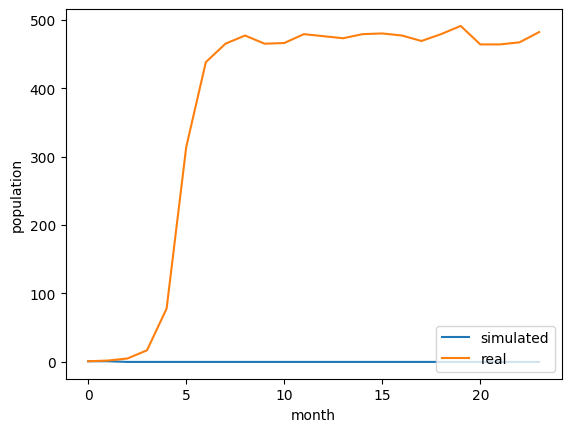

In [35]:
plt.plot(list_timeSeries_num, label = "simulated")
plt.plot(list_timeSeries_num_real, label = "real")
plt.xlabel("month")
plt.ylabel("population")
plt.legend(loc="lower right")
plt.show()

## ノック80: シミュレーションによる将来予測

In [36]:
# 期間を延長してシミュレートしてみる
T_NUM = 36

In [37]:
percent_percolation = 0.025184661323275185
percent_disapparence = 0.10147163541419416
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
  list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_mem_links)
  list_timeSeries.append(list_active.copy())

In [38]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
  list_timeSeries_num.append(sum(list_timeSeries[i]))

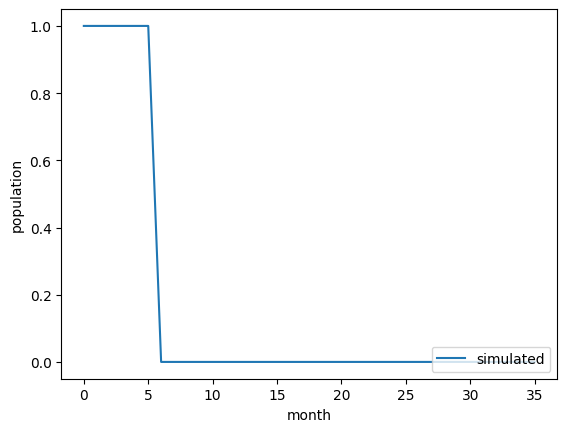

In [39]:
plt.plot(list_timeSeries_num, label = "simulated")
plt.xlabel("month")
plt.ylabel("population")
plt.legend(loc="lower right")
plt.show()